### Installing pyspark module

In [1]:
!pip install pyspark

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the modules

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plts

creating spark session

In [4]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

### importing the *Listenings.csv* file:

In [5]:
listening_csv_path = "/content/drive/MyDrive/Web Learning/PySpark/listenings.csv"

In [6]:
listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listening_csv_path)

Check the data:

In [7]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

Delete useless columns:

In [8]:
listening_df = listening_df.drop('date')

Drop the null rows:

In [9]:
listening_df = listening_df.na.drop()

Check the dataset again:

In [10]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

Check the schema:

In [11]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



Get the shape of our dataframe:

In [12]:
shape = (listening_df.count(), len(listening_df.columns))

In [13]:
print(shape)

(13758905, 4)


### Running Queries



**Query #0:**
select two columns: track and artist

In [14]:
artist_track = listening_df.select('artist', 'track')
artist_track.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Find all of the records of those users who have listened to ***Rihanna***

In [15]:
users_Rihanna = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
users_Rihanna.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

In [16]:
users_Rihanna.count()

41594

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [17]:
top_10_users_Rihanna = listening_df.select('*').filter(listening_df.artist == 'Rihanna')\
.groupby(listening_df.user_id).agg(count(listening_df.user_id).alias('count'))\
.orderBy(desc('count')).limit(10)


In [18]:
top_10_users_Rihanna.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

Find top 10 famous tracks

In [19]:
top_10_tracks = listening_df.select('*').groupby(listening_df.artist, listening_df.track)\
.agg(count('*').alias('count'))\
.orderBy(desc('count')).limit(10)


In [20]:
top_10_tracks.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

Find top 10 famous tracks of ***Rihanna***

In [21]:
top_10_tracks_Rihanna = listening_df.select('artist', 'track').filter(listening_df.artist == "Rihanna")\
.groupBy(listening_df.artist, listening_df.track).agg(count('*').alias('count'))\
.orderBy(desc('count')).limit(10)


In [22]:
top_10_tracks_Rihanna.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



**Query #5:**

Find top 10 famous albums

In [23]:
top_10_albums = listening_df.select('artist', 'album')\
.groupBy(listening_df.artist, listening_df.album).agg(count('*').alias('count'))\
.orderBy(desc('count')).limit(10)

In [24]:
top_10_albums.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



### importing the ***genre.csv*** file:

In [25]:
genre_csv_path = "/content/drive/MyDrive/Web Learning/PySpark/genre.csv"


In [26]:
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genre_csv_path)

Check the genre data

In [27]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



### Printing genre_df dimentions

In [28]:
genre_dimentions = (genre_df.count(), len(genre_df.columns))

print(genre_dimentions)

(138432, 2)


Inner join listening and genre data frames

In [29]:
data_joined = listening_df.join(genre_df, how = 'inner', on = ['artist'])

In [30]:
data_joined.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

Find top 10 users who are fan of ***pop*** music

In [31]:
top_10_pop_fan = data_joined.select('*')\
.filter(data_joined.genre == 'pop')\
.groupBy(data_joined.user_id).agg(count(data_joined.user_id).alias('count'))\
.orderBy(desc('count')).limit(10)

In [32]:
top_10_pop_fan.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

Find top 10 famous genres

In [33]:
top_10_genre = data_joined.select('*')\
.groupBy('genre').agg(count('*').alias('count'))\
.orderBy(desc('count')).limit(10)

In [34]:
top_10_genre.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+




**Query #8**

Find out each user favourite genre

In [35]:
user_genre_count = data_joined.select('*')\
.groupBy('user_id','genre').agg(count('*').alias('count'))\
.orderBy('user_id')

In [36]:
user_genre_count.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph| Boston Pops Orch...|    1|
| --Seph|               Bjorn|    8|
| --Seph|                 pop|    9|
| --Seph| brazilian pop music|    1|
| --Seph|          Nils Frahm|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|               dance|    1|
| --Seph|        instrumental|    1|
| --Seph|  progressive trance|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|               samba|    2|
| --Seph|               Ruben|    4|
| --Seph|             ambient|    6|
| --Seph|           classical|   31|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|               indie|    3|
| --Seph|             baroque|    1|
| --Seph|         heavy metal|    1|
| --Seph|     Hilko Schomerus|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [37]:
user_fav_genre = user_genre_count.groupBy('user_id')\
.agg(max(struct('genre', 'count')).alias('max')).\
select(col('user_id'), col('max.genre'))

user_fav_genre.show()

+---------------+------------+
|        user_id|       genre|
+---------------+------------+
|      --Shinn--|thrash metal|
|       --ollz--|    trip hop|
|     -Amnesiac-|        rock|
|         -Bish-|viking metal|
|        -Danni-|  soundtrack|
|          -DeWp|    trip hop|
|      -Faction-|    synthpop|
|-February-Star-|        soul|
|        -Gemma-|        soul|
|   -Gingergirl-|        soul|
|        -Hazel-|    twee pop|
|        -Heiko-|      techno|
|         -Katie|        rock|
|      -Krystal-|        rock|
|         -Mark-|  space rock|
|       -Mullet-|      trance|
|          -Robs|   uk garage|
| -SleepingStar-| pagan metal|
|      -Stifler-|        rock|
|  -Toxic-Waste-|      trance|
+---------------+------------+
only showing top 20 rows



**Query #9**

Find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart

In [38]:
pop_rock_metal_count = genre_df.select('genre')\
.filter((col('genre') == 'pop') | (col('genre') =='metal')| (col('genre') == 'rock')| (col('genre') == 'hip hop'))\
.groupBy('genre').agg(count('genre').alias('count'))

In [39]:
pop_rock_metal_count.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Visualize the results using ***matplotlib***

In [40]:
data_plot = pop_rock_metal_count.collect()
data_plot

[Row(genre='pop', count=6960),
 Row(genre='hip hop', count=4288),
 Row(genre='metal', count=1854),
 Row(genre='rock', count=9066)]

Text(0.5, 1.0, 'Bar-Plot of Genre')

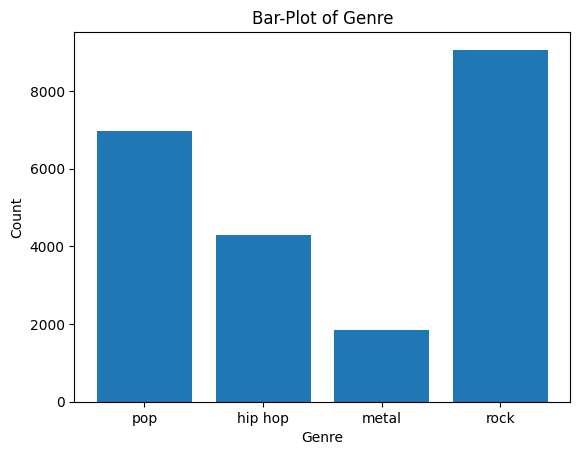

In [41]:
plts.bar([x['genre']for x in data_plot], [y['count'] for y in data_plot])
plts.xlabel("Genre")
plts.ylabel("Count")
plts.title("Bar-Plot of Genre")